# Identification

### Date: 10/10/2023
### Name: LAVERSIN MATHIEU
### E-mail: mathieu.laversin@epfedu.fr

# Exercise 1: Logistic Regression

In this practical exercise, we will work with Logistic Regression.
We will use data from Twitter, and try to extract the sentiment of a given tweet (Positive or Negative).

This exercise is diveded into the following parts:

* Extracting features from text for logistic regression
* Implementing logistic regression
* Use logistic regression and test it for an NLP example
* Analyse the error of the model


### Needed Downloads

We will have to download some datasets for this exercise. Specially, we will be using the [twitter_samples dataset](http://www.nltk.org/howto/twitter.html) from nltk.

* You can download this dataset running the following comand in Python:
```Python
nltk.download('twitter_samples')
```

We will also use a dateset of stopwords, to help us getting rid of unwanted tokens that would make our model less accurate.

* You can download the list of stopwords running the following comand in Python:
```python
nltk.download('stopwords')
```

#### You can also use the following functions from the utils.py file:
* `process_tweet()`: cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: returns a `freqs` dictionary, which is a python dictionary where each key is a (word,label) tuple. The `value` associated to the key is the count of the occurrences of a `word` (from the key) in the **corpus** (the entire dataset of tweets) that is categorized to the `label` (from the key). The label can either be '1' (positive) or '0' (negative).

## Imports

In [1]:
# run this cell to import nltk
import nltk
from os import getcwd

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/mathieu/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathieu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

from utils import process_tweet, build_freqs

### Prepare the data
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.  
    * If you used all three datasets, we would introduce duplicates of the positive tweets and negative tweets.  
    * You will select just the five thousand positive tweets and five thousand negative tweets.

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

* Train test split:


In [6]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

* Create the numpy array of positive labels and negative labels.

In [7]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [8]:
# Print the shape train and test sets
print(f'train_y.shape: {str(train_y.shape)}')
print(f'test_y.shape: {str(test_y.shape)}')

train_y.shape: (8000, 1)
test_y.shape: (2000, 1)


### Build the frequency dictionary

* You can create the frequency dict using the `build_freqs()` from the provided `utils.py`. Don't forget to check the code and try to understand what it is doing.

Loop:

```Python
    for y,tweet in zip(ys, tweets): # on each tweet
        for word in process_tweet(tweet): # on each word of the tweet
            pair = (word, y)
            if pair in freqs: # if the pair is already a key...
                freqs[pair] += 1 # increases the count
            else: # if the pair is not yet a key...
                freqs[pair] = 1 # adds a new pair to the dict
```

In [10]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print(f'type(freqs): {str(type(freqs))}')
print(f'len(freqs): {str(len(freqs.keys()))}')

type(freqs): <class 'dict'>
len(freqs): 11340


#### You should get:
```
type(freqs): <class 'dict'>
len(freqs): 11346
```

### Preprocessing
`process_tweet()` splits the tweet into words, removes stop words and applies stemming. This is also called tokenization.

In [ ]:
# test the function below
print(f'Example of a positive tweet: {train_x[0]}')
print(f'This is the same tweet after being processed:\n{process_tweet(train_x[0])}')

Example of a positive tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
This is the same tweet after being processed:
['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


#### You should get:

```
This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
 
This is an example of the processes version: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']
```

# Part 1: Logistic regression 


### Part 1.1: Sigmoid
Lets use logistic regression to classify sentiments in texts.
* Remember the sigmoid function:

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

The output is a probability value between 0 and 1.

#### Now, implement your sigmoid function
PS:
* This function shall work if it receives `z` as a numpy arrray.
* Check: [numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

Text(0.5, 1.0, 'Graphique of the sigmoid from 0 to 100')

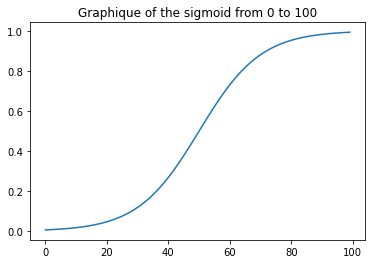

In [5]:

import matplotlib.pyplot as plt
def sigmoid(z): 
    #h = []
    
    '''
    Input:
        z: iscalar or numpy array
    Output:
        h: the sigmoid of z
    '''

    #h.append(1/ 1+ math.exp(-z))

    return np.divide(1,1+np.exp(-z))

a = sigmoid(np.arange(-5,5,0.1))
plt.plot(a)
plt.title('Graphique of the sigmoid from 0 to 100')


#### Testing:

In [12]:
if (sigmoid(0) == 0.5):
    print('Pass.')
else:
    print('Sigmoid Function is badly implemented.')

if (sigmoid(4.92) == 0.9927537604041685):
    print('Pass.')
else:
    print('Sigmoid Function is badly implemented.')

Pass.
Pass.


### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If you took the Deep Learning Specialization, we referred to the weights with the `w` vector.  In this course, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

### Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

In [13]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

In [14]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


## Instructions: Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

#### Now, implement you Gradient Descent method:

PS:
* Use `np.dot` for matrix multiplication.
* Make sure that the fraction -1/m is a floating point type. To do so, you can splicitly cast the type, e.g.:`float(1)`, or just `1.0`.


## Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

In [15]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations for which you want to train your model
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m, _ = x.shape
    
    for i in range(num_iters):
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        # get the sigmoid of z
        h = sigmoid(z)
        # calculate the cost function
        J = (-1.0/len(x)) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))
        # update the weights theta
        theta -= (alpha/len(x)) *(np.dot(x.T, (h - y)))
    J = float(J)

    return J, theta

In [16]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f'Cost after training : {tmp_J:.8f}.')
print(f'Vector of weights : {[round(t, 8) for t in np.squeeze(tmp_theta)]}')

Cost after training : 0.67094970.
Vector of weights : [4.1e-07, 0.00035658, 7.309e-05]


#### You should get:

```
Cost after training : 0.67094970.
Vector of weights : [4.1e-07, 0.00035658, 7.309e-05]
```

## Extracting the features

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The number of positive words in a tweet.
    * The number of negative words in a tweet. 
* Then train your logistic regression classifier on these features.
* Test the classifier on a validation set. 

### Instructions: Implement the extract_features function. 
* This function takes in a single tweet.
* Process the tweet using the imported `process_tweet()` function and save the list of tweet words.
* Loop through each word in the list of processed words
    * For each word, check the `freqs` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)


PS:
* You have to handle cases where the (word, label) key is not present in the dictionary. 
* Hint: check the [.get() method from Python dictionary](https://www.programiz.com/python-programming/methods/dictionary/get).

In [17]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
        
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0.0),0)
        
    assert(x.shape == (1, 3))
    return x

#### Testing:

In [18]:
# Testing on expected training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


#### You should get:

```
[[1.00e+00 3.02e+03 6.10e+01]]
```

In [19]:
# Testing for a text with words not present in the dictionary
tmp2 = extract_features('bada foo viande moules', freqs)
print(tmp2)

[[1. 0. 0.]]


#### You should get:

```
[[1. 0. 0.]]
```

## Training Your Model

To train the model:
* Put all the features for all training examples into a matrix `X`. 
* Call the Gradient Descest method `gradientDescent` that you have just programmed.

### This section is already programmed. Just go by it and understand what each part of the code is doing.
### Explain it in your final report.

In [20]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f'Cost after training : {J:.8f}.')
print(f'Vector of weights : {[round(t, 8) for t in np.squeeze(theta)]}')

Cost after training : 0.24216477.
Vector of weights : [7e-08, 0.0005239, -0.00055517]


#### You should get:

```
Cost after training : 0.24216529.
Vector of weights : [7e-08, 0.0005239, -0.00055517]
```

# Test your logistic regression

It is time for you to test your logistic regression function on some new input that your model has not seen before. 

#### Instructions: Write `predict_tweet`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [21]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    
    return y_pred

#### Testing:

In [22]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


#### You should get:

```
I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561
```

#### Test with your own tweet:

In [6]:
my_tweet = 'I ate a cow'
predict_tweet(my_tweet, freqs, theta)

NameError: name 'predict_tweet' is not defined

## Check performance using the test set
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

#### Instructions: Implement `test_logistic_regression` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* Use your `predict_tweet()` function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification `y_hat` to 1, otherwise set the model's classification `y_hat` to 0.
* A prediction is accurate when `y_hat` equals `test_y`.  Sum up all the instances when they are equal and divide by `m`.


PS:
* You can use [np.asarray()](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) to convert a lists to numpy array.
* You can use [np.squeeze()](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html) to make an (m,1) dimensional array into an (m,) array.


In [24]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
        
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)## ADD YOUR CODE HERE
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append([1.0])
        else:
            # append 0 to the list
            ## ADD YOUR CODE HERE
            y_hat.append([0.0])


    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = np.mean(np.equal(test_y.reshape(-1,1),y_hat))

    
    return accuracy

In [ ]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f'Logistic regression model accuracy : {tmp_accuracy:.4f}')

Logistic regression model accuracy : 0.9950


#### You should get:

```0.9950```  
Not bad for such a simple model.

# Error Analysis

Now lets check some misclassifications.
Can you think about reasons for those errors?
What those tweets have in common?

In [25]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print(f'__________________________________________')
        print(f'THE TWEET IS: {x}')
        print(f'THE PROCESSED TWEET IS:\n{process_tweet(x)}')
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
__________________________________________
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS:
['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996897	b'truli later move know queen bee upward bound movingonup'
__________________________________________
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS:
['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48650628	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
__________________________________________
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
TH

### Try to think about it and discuss about the issue in you Report.

# Predict your own text

In [26]:
# Test your own texts here
my_tweet = 'I hate sushi, please bring me some meat.'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive.')
else: 
    print('Negative.')

['hate', 'sushi', 'pleas', 'bring', 'meat']
[[0.47201289]]
Negative.
